In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
MODELS = ['deepCNN', 'CNN', 'DTW', 'LSTM', 'transformer', 'shapelet+XGB', 'stats+XGB', 'SN', 'DATW'] # 'DATW', 'SN'
RESULTS_DIR = './results/'

In [26]:
results_df = pd.DataFrame()
for model_name in MODELS:
    if model_name == 'DATW':
        file = os.path.join(RESULTS_DIR, model_name, 'DATW_default', f'{model_name}_clf_scores.csv')
    elif model_name == 'SN':
        file = os.path.join(RESULTS_DIR, model_name, 'SN_dropout_more_iter', f'{model_name}_clf_scores.csv')
    else:
        file = os.path.join(RESULTS_DIR, model_name, f'{model_name}_clf_scores.csv')
    df = pd.read_csv(file)
    df.index = [model_name]
    results_df = pd.concat([results_df, df])
results_df = results_df.sort_values(by='f1-score weighted avg', ascending=False)
results_df.style.background_gradient(cmap='Blues')

,accuracy,f1-score macro avg,f1-score weighted avg,precision macro avg,precision weighted avg,recall macro avg,recall weighted avg
DATW,0.827160,0.828372,0.820239,0.845938,0.846767,0.839216,0.827160
DTW,0.802469,0.801356,0.797943,0.827451,0.824809,0.806863,0.802469
stats+XGB,0.790123,0.793791,0.790809,0.811905,0.817842,0.800980,0.790123
SN,0.765432,0.756632,0.758432,0.788445,0.790344,0.764706,0.765432
LSTM,0.753086,0.746446,0.748488,0.785294,0.787757,0.750000,0.753086
deepCNN,0.753086,0.749097,0.742187,0.772269,0.767196,0.762745,0.753086
CNN,0.679012,0.680768,0.673759,0.711555,0.707128,0.688235,0.679012
shapelet+XGB,0.679012,0.669873,0.671839,0.701261,0.704027,0.677451,0.679012
transformer,0.641975,0.611932,0.616041,0.659150,0.668024,0.642157,0.641975


<img src="./results/CNN/CNN_confusion_matrix.png" style="width:33%;"/><img src="./results/LSTM/LSTM_confusion_matrix.png" style="width:33%;"/><img src="./results/DTW/DTW_confusion_matrix.png" style="width:33%;"/>

<img src="./results/deepCNN/deepCNN_confusion_matrix.png" style="width:33%;"/><img src="./results/shapelet+XGB/shapelet+XGB_confusion_matrix.png" style="width:33%;"/><img src="./results/transformer/transformer_confusion_matrix.png" style="width:33%;"/>

<img src="./results/stats+XGB/stats+XGB_confusion_matrix.png" style="width:33%;"/>


<img src="./results/SN/SN_dropout_more_iter/SN_confusion_matrix.png" style="width:50%;"/><img src="./results/DATW/DATW_default/DATW_confusion_matrix.png" style="width:50%;"/>

In [4]:
data = np.load('./dataset/dataset.npz')
X_test = data['X_test']
y_test = data['y_test']
ids_test = data['ids_test']
y_mapping = data['y_mapping']

In [5]:
errors = np.zeros(y_test.shape[0])
for model_name in MODELS:
    model_preds = np.load(os.path.join(RESULTS_DIR, f'{model_name}_predictions.npy'))
    errors += (model_preds != y_test).astype(int)
errors /= len(MODELS)
errors = errors * 100
errors_df = pd.DataFrame(errors, columns=['Missclassification %'], index=ids_test)
errors_df.sort_values(by='Missclassification %', ascending=False, inplace=True)
errors_df[errors_df['Missclassification %']>0].plot.barh(figsize=(10, 8), title='Missclassification % per sample')

ValueError: operands could not be broadcast together with shapes (78,) (77,) 

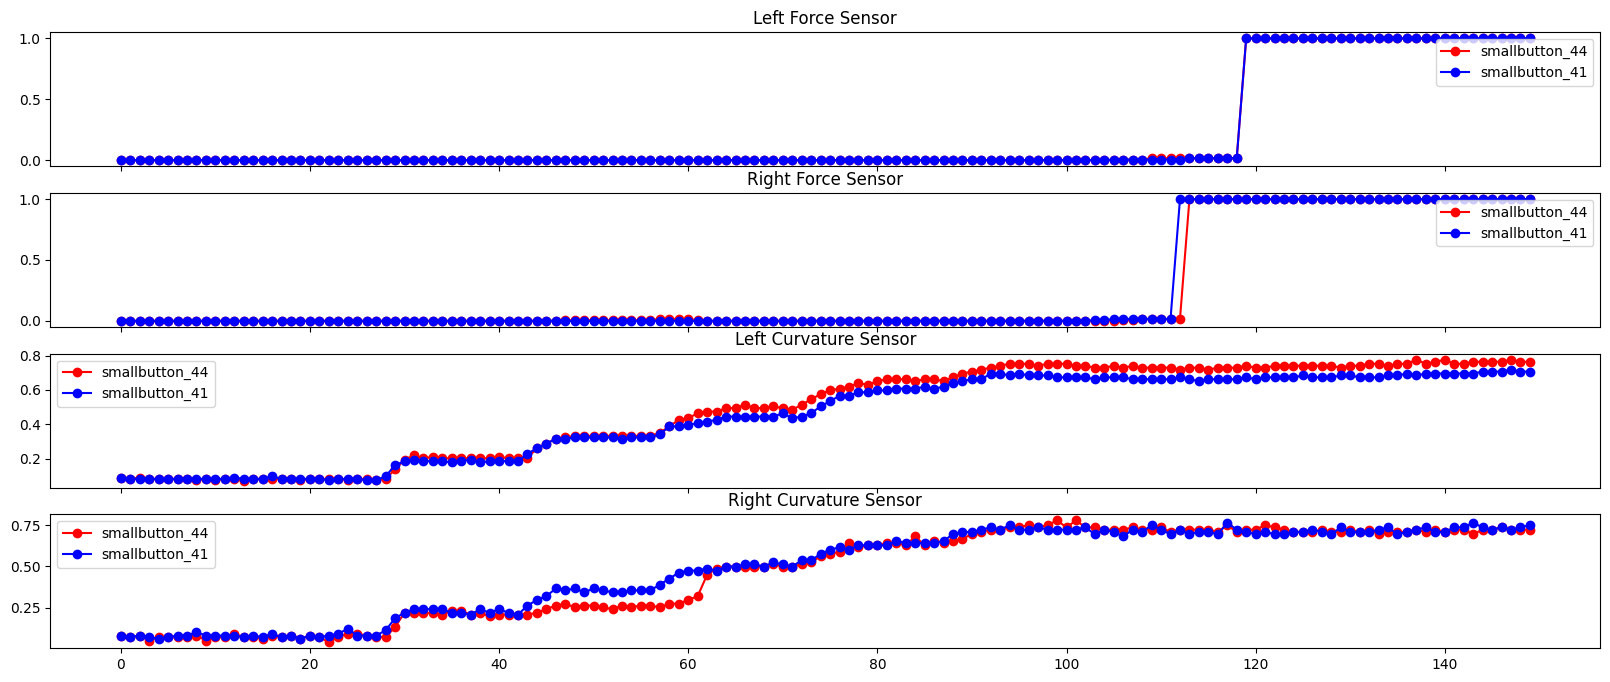

In [ ]:
sample_id = 'smallbutton_44'
sample_index = np.where(ids_test == sample_id)[0][0]
sample_data = X_test[sample_index]


sample_id2 = 'smallbutton_41'
sample_index2 = np.where(ids_test == sample_id2)[0][0]
sample_data2 = X_test[sample_index2]

fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)
axs[0].plot(sample_data[:, 0], '-o', c='r', label=sample_id)
axs[0].plot(sample_data2[:, 0], '-o', c='b', label=sample_id2)
axs[0].legend()
axs[0].set_title(f'Left Force Sensor')
axs[1].plot(sample_data[:, 1], '-o', c='r', label=sample_id)
axs[1].plot(sample_data2[:, 1], '-o', c='b', label=sample_id2)
axs[1].legend()
axs[1].set_title(f'Right Force Sensor')
axs[2].plot(sample_data[:, 2], '-o', c='r', label=sample_id)
axs[2].plot(sample_data2[:, 2], '-o', c='b', label=sample_id2)
axs[2].legend()
axs[2].set_title(f'Left Curvature Sensor')
axs[3].plot(sample_data[:, 3], '-o', c='r', label=sample_id)
axs[3].plot(sample_data2[:, 3], '-o', c='b', label=sample_id2)
axs[3].legend()
axs[3].set_title(f'Right Curvature Sensor');

## Few-shot learning

In [34]:
datw_10s_df = pd.read_csv('./results/DATW/DATW_10shot/DATW_clf_scores.csv', index_col=0)
datw_10s_df.index = [f'DATW 10-shot {idx}' for idx in datw_10s_df.index]
datw_5s_df = pd.read_csv('./results/DATW/DATW_5shot/DATW_clf_scores.csv', index_col=0)
datw_5s_df.index = [f'DATW 5-shot {idx}' for idx in datw_5s_df.index]
sn_10s_df = pd.read_csv('./results/SN/SN_10shot/SN_clf_scores.csv', index_col=0)
sn_10s_df.index = [f'SN 10-shot {idx}' for idx in sn_10s_df.index]
sn_5s_df = pd.read_csv('./results/SN/SN_5shot/SN_clf_scores.csv', index_col=0)
sn_5s_df.index = [f'SN 5-shot {idx}' for idx in sn_5s_df.index]
few_shot_df = pd.concat([datw_10s_df, datw_5s_df, sn_10s_df, sn_5s_df])
few_shot_df = few_shot_df.sort_values(by='f1-score weighted avg', ascending=False)
few_shot_df.style.background_gradient(cmap='Blues')

,accuracy,f1-score macro avg,f1-score weighted avg,precision macro avg,precision weighted avg,recall macro avg,recall weighted avg
DATW 10-shot New Ref,0.881081,0.884006,0.880193,0.886104,0.886736,0.888947,0.881081
DATW 5-shot New Ref,0.861905,0.863981,0.863310,0.869240,0.871661,0.865531,0.861905
SN 10-shot New Ref,0.837838,0.836266,0.830519,0.840945,0.841129,0.849009,0.837838
SN 5-shot New Ref,0.790476,0.791284,0.786153,0.796458,0.795877,0.800155,0.790476
DATW 10-shot Sub Ref,0.664865,0.299011,0.765835,0.361445,0.939097,0.262507,0.664865
DATW 5-shot Sub Ref,0.552381,0.221240,0.670770,0.303783,0.914065,0.181341,0.552381
SN 10-shot Sub Ref,0.481081,0.207921,0.609293,0.297154,0.884410,0.165181,0.481081
DATW 10-shot Full Ref,0.464865,0.189817,0.586929,0.299038,0.957131,0.153196,0.464865
SN 10-shot Full Ref,0.427027,0.190487,0.557227,0.306569,0.917325,0.147199,0.427027
SN 5-shot Sub Ref,0.366667,0.155858,0.501406,0.286839,0.913621,0.113555,0.366667


**DATW, 5-shots**

<img src="./results/DATW/DATW_5shot/DATW_confusion_matrix_full_ref.png" style="width:33%;"/><img src="./results/DATW/DATW_5shot/DATW_confusion_matrix_sub_ref.png" style="width:33%;"/><img src="./results/DATW/DATW_5shot/DATW_confusion_matrix_new_ref.png" style="width:33%;"/>

**SN, 5-shots**

<img src="./results/SN/SN_5shot/SN_confusion_matrix_full_ref.png" style="width:33%;"/><img src="./results/SN/SN_5shot/SN_confusion_matrix_sub_ref.png" style="width:33%;"/><img src="./results/SN/SN_5shot/SN_confusion_matrix_new_ref.png" style="width:33%;"/>


**DATW, 10-shots**

<img src="./results/DATW/DATW_10shot/DATW_confusion_matrix_full_ref.png" style="width:33%;"/><img src="./results/DATW/DATW_10shot/DATW_confusion_matrix_sub_ref.png" style="width:33%;"/><img src="./results/DATW/DATW_10shot/DATW_confusion_matrix_new_ref.png" style="width:33%;"/>

**SN, 10-shots**

<img src="./results/SN/SN_10shot/SN_confusion_matrix_full_ref.png" style="width:33%;"/><img src="./results/SN/SN_10shot/SN_confusion_matrix_sub_ref.png" style="width:33%;"/><img src="./results/SN/SN_10shot/SN_confusion_matrix_new_ref.png" style="width:33%;"/>